# QUESTION 1

In [1]:
packages <- c("tidyverse", "fixest", "lmtest", "sandwich", "broom", "knitr")
new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages, repos = "http://cran.us.r-project.org")
invisible(lapply(packages, library, character.only = TRUE))

Installing packages into 'C:/Users/camif/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'bit', 'bit64', 'blob', 'DBI', 'gargle', 'ids', 'rematch2', 'vroom', 'selectr', 'conflicted', 'dbplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'httr', 'readr', 'reprex', 'rvest', 'dreamerr', 'stringmagic'




package 'bit' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'gargle' successfully unpacked and MD5 sums checked
package 'ids' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'vroom' successfully unpacked and MD5 sums checked
package 'selectr' successfully unpacked and MD5 sums checked
package 'conflicted' successfully unpacked and MD5 sums checked
package 'dbplyr' successfully unpacked and MD5 sums checked
package 'dtplyr' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 sums checked
package 'googledrive' successfully unpacked and MD5 sums checked
package 'googlesheets4' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'httr' successfully unpack

Warning message:
"package 'tidyverse' was built under R version 4.5.2"
Warning message:
"package 'ggplot2' was built under R version 4.5.2"
Warning message:
"package 'tidyr' was built under R version 4.5.2"
Warning message:
"package 'readr' was built under R version 4.5.2"
Warning message:
"package 'dplyr' was built under R version 4.5.2"
Warning message:
"package 'forcats' was built under R version 4.5.2"
Warning message:
"package 'lubridate' was built under R version 4.5.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become er

**Part A**

In [3]:
url <- "https://raw.githubusercontent.com/LOST-STATS/LOST-STATS.github.io/master/Model_Estimation/Data/Event_Study_DiD/bacon_example.csv"
df <- read.csv(url)

# Renombrar columna X_nfd a _nfd (corrección)
names(df)[names(df) == "X_nfd"] <- "_nfd"

# Crear variable de tratamiento (ya funcionará)
df <- df %>%
  mutate(treated = if_else(!is.na(.data[["_nfd"]]) & year >= .data[["_nfd"]], 1, 0))

# Crear variable de tiempo relativo
df <- df %>%
  mutate(event_time = if_else(!is.na(.data[["_nfd"]]), year - .data[["_nfd"]], as.numeric(-1000)))


# Verificar si event_time fue creado
cat("Columnas en df tras crear event_time:\n")
print(names(df))

# Modelo TWFE
twfe_model <- feols(asmrs ~ treated + pcinc + asmrh + cases | stfips + year, 
                    data = df, 
                    cluster = ~stfips)
cat("✓ Modelo TWFE estimado\n")
print(summary(twfe_model))

Columnas en df tras crear event_time:
 [1] "stfips"     "year"       "_nfd"       "post"       "asmrs"     
 [6] "pcinc"      "asmrh"      "cases"      "weight"     "copop"     
[11] "treated"    "event_time"
✓ Modelo TWFE estimado
OLS estimation, Dep. Var.: asmrs
Observations: 1,617
Fixed-effects: stfips: 49,  year: 33
Standard-errors: Clustered (stfips) 
           Estimate Std. Error  t value Pr(>|t|)    
treated   -2.515964   2.283101 -1.10199 0.275959    
pcinc     -0.001118   0.000361 -3.09434 0.003286 ** 
asmrh      1.184598   0.576545  2.05465 0.045378 *  
cases   -178.517916 137.973884 -1.29385 0.201907    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 10.6     Adj. R2: 0.693695
             Within R2: 0.034601


**Part B**

In [4]:
# Tabla de frecuencias
df_treated <- df %>% filter(event_time != -1000)
freq_table <- df_treated %>%
  count(event_time, name = "Frecuencia") %>%
  arrange(event_time) %>%
  mutate(Porcentaje = round(Frecuencia / sum(Frecuencia) * 100, 2))
print(freq_table)

# Distribución acumulada 
png("event_time_distribution.png", width = 10, height = 6, units = "in", res = 300)
cumsum_data <- cumsum(freq_table$Frecuencia) / sum(freq_table$Frecuencia) * 100
plot(freq_table$event_time, cumsum_data, type = "b", pch = 16, col = "steelblue",
     lwd = 2, main = "Distribución Acumulada de Event Time",
     xlab = "Event Time", ylab = "Porcentaje Acumulado (%)",
     cex.main = 1.2, font.main = 2, cex.lab = 1.1, font.lab = 2)
abline(v = 0, col = "red", lwd = 2, lty = 2)
legend("bottomright", legend = "Tratamiento (t=0)", col = "red", lwd = 2, lty = 2)
grid()
dev.off()
cat("✓ Gráfico de distribución acumulada guardado: event_time_distribution.png\n")

   event_time Frecuencia Porcentaje
1         -21          1       0.08
2         -20          2       0.17
3         -19          2       0.17
4         -18          2       0.17
5         -17          2       0.17
6         -16          3       0.25
7         -15          3       0.25
8         -14          3       0.25
9         -13          6       0.51
10        -12          7       0.59
11        -11          9       0.76
12        -10         12       1.01
13         -9         22       1.85
14         -8         25       2.10
15         -7         32       2.69
16         -6         34       2.86
17         -5         36       3.03
18         -4         36       3.03
19         -3         36       3.03
20         -2         36       3.03
21         -1         36       3.03
22          0         36       3.03
23          1         36       3.03
24          2         36       3.03
25          3         36       3.03
26          4         36       3.03
27          5         36    

agg_record_148242656 
                   2

✓ Gráfico de distribución acumulada guardado: event_time_distribution.png


**Parte C**

In [5]:
# Agrupar event times extremos
df <- df %>%
  mutate(event_time_grouped = case_when(
    event_time == -1000 ~ -1000,  # nunca tratados
    event_time <= -6 ~ -6,         # agrupar < -6
    event_time >= 5 ~ 5,           # agrupar > 5
    TRUE ~ event_time
  ))

# Crear dummies (omitir -1 como referencia)
df <- df %>%
  mutate(across(starts_with("rel_"), ~ NULL)) %>%  # limpiar si existen
  mutate(
    rel_m6 = if_else(event_time_grouped == -6, 1, 0),
    rel_m5 = if_else(event_time_grouped == -5, 1, 0),
    rel_m4 = if_else(event_time_grouped == -4, 1, 0),
    rel_m3 = if_else(event_time_grouped == -3, 1, 0),
    rel_m2 = if_else(event_time_grouped == -2, 1, 0),
    # rel_m1 se omite como referencia
    rel_0 = if_else(event_time_grouped == 0, 1, 0),
    rel_1 = if_else(event_time_grouped == 1, 1, 0),
    rel_2 = if_else(event_time_grouped == 2, 1, 0),
    rel_3 = if_else(event_time_grouped == 3, 1, 0),
    rel_4 = if_else(event_time_grouped == 4, 1, 0),
    rel_5 = if_else(event_time_grouped == 5, 1, 0)
  )

# Event-Study model
event_study_model <- feols(
  asmrs ~ rel_m6 + rel_m5 + rel_m4 + rel_m3 + rel_m2 + 
          rel_0 + rel_1 + rel_2 + rel_3 + rel_4 + rel_5 +
          pcinc + asmrh + cases | stfips + year,
  data = df,
  cluster = ~stfips
)

summary(event_study_model)

# Extraer coeficientes
es_coefs <- data.frame(
  event_time = c(-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5),
  coef = c(coef(event_study_model)[1:5], 0, coef(event_study_model)[6:11]),
  se = c(se(event_study_model)[1:5], 0, se(event_study_model)[6:11])
)

es_coefs
write.csv(es_coefs, "event_study_coefs.csv", row.names = FALSE)

OLS estimation, Dep. Var.: asmrs
Observations: 1,617
Fixed-effects: stfips: 49,  year: 33
Standard-errors: Clustered (stfips) 
          Estimate Std. Error   t value  Pr(>|t|)    
rel_m6   -2.374643   3.458866 -0.686538 0.4956772    
rel_m5   -2.746056   2.633831 -1.042609 0.3023522    
rel_m4    0.205064   2.420383  0.084724 0.9328334    
rel_m3   -2.356800   2.948235 -0.799393 0.4280005    
rel_m2   -0.542558   2.525521 -0.214830 0.8308099    
rel_0     0.306564   2.701739  0.113469 0.9101320    
rel_1    -1.701350   2.915905 -0.583472 0.5623071    
rel_2    -1.831200   3.843432 -0.476449 0.6359162    
rel_3    -1.011992   2.868525 -0.352792 0.7257892    
rel_4    -3.245104   2.865708 -1.132392 0.2630950    
rel_5    -6.450939   3.257638 -1.980250 0.0534232 .  
pcinc    -0.001105   0.000376 -2.941222 0.0050191 ** 
asmrh     1.232658   0.567384  2.172531 0.0347845 *  
cases  -199.250215 138.127551 -1.442509 0.1556528    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' 

,event_time,coef,se
,<dbl>,<dbl>,<dbl>
rel_m6,-6,-2.3746431,3.458866
rel_m5,-5,-2.7460563,2.633831
rel_m4,-4,0.2050640,2.420383
rel_m3,-3,-2.3567999,2.948235
rel_m2,-2,-0.5425582,2.525521
,-1,0.0000000,0.000000
rel_0,0,0.3065636,2.701739
rel_1,1,-1.7013501,2.915905
rel_2,2,-1.8311998,3.843432


# QUESTION 2

In [12]:
# Paquetes
install.packages("did")
install.packages("dplyr")
install.packages("ggplot2")

library(did)
library(dplyr)
library(ggplot2)

Installing package into 'C:/Users/camif/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'did' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\camif\AppData\Local\Temp\Rtmp0SXoFf\downloaded_packages


Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'did' was built under R version 4.5.2"


In [13]:
data <- read.csv("https://raw.githubusercontent.com/LOST-STATS/LOST-STATS.github.io/master/Model_Estimation/Data/Event_Study_DiD/bacon_example.csv")

# Ver datos
head(data)
str(data)

,stfips,year,X_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1964,1971,0,35.63988,12406.18,5.007341,0.012312243,1715156,1715156
2,1,1965,1971,0,41.54375,13070.21,4.425367,0.010419407,1715156,1725186
3,1,1966,1971,0,34.25233,13526.66,4.874819,0.009900097,1715156,1735219
4,1,1967,1971,0,34.46502,13918.19,5.362014,0.009974692,1715156,1745250
5,1,1968,1971,0,40.44011,14684.81,4.643759,0.012400659,1715156,1755283
6,1,1969,1971,0,42.49012,15638.88,5.296976,0.015006756,1715156,1765316


'data.frame':	1617 obs. of  10 variables:
 $ stfips: int  1 1 1 1 1 1 1 1 1 1 ...
 $ year  : int  1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 ...
 $ X_nfd : int  1971 1971 1971 1971 1971 1971 1971 1971 1971 1971 ...
 $ post  : int  0 0 0 0 0 0 0 1 1 1 ...
 $ asmrs : num  35.6 41.5 34.3 34.5 40.4 ...
 $ pcinc : num  12406 13070 13527 13918 14685 ...
 $ asmrh : num  5.01 4.43 4.87 5.36 4.64 ...
 $ cases : num  0.01231 0.01042 0.0099 0.00997 0.0124 ...
 $ weight: num  1715156 1715156 1715156 1715156 1715156 ...
 $ copop : num  1715156 1725186 1735219 1745250 1755283 ...


In [14]:
# Crear variable G (cohort de tratamiento)
data <- data %>%
  group_by(stfips) %>%
  mutate(G = ifelse(any(post == 1), min(year[post == 1]), 0)) %>%
  ungroup()

# Verificar G
table(data$G)


   0 1964 1969 1970 1971 1972 1973 1974 1975 1976 1977 1980 1984 1985 
 165  264   66   66  231   99  330   99   66   33   99   33   33   33 

**Part A: Estimation**

In [15]:
csdid_result <- att_gt(
  yname = "asmrs",
  tname = "year",
  idname = "stfips",
  gname = "G",
  xformla = ~ pcinc + asmrh + cases,
  data = data,
  control_group = "notyettreated"
)

summary(csdid_result)

Warning message in pre_process_did(yname = yname, tname = tname, idname = idname, :
"Dropped 8 units that were already treated in the first period."
Warning message in pre_process_did(yname = yname, tname = tname, idname = idname, :
"Be aware that there are some small groups in your dataset.
  Check groups: 0,1969,1970,1971,1972,1974,1975,1976,1977,1980,1984,1985."
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in compute.att_gt(dp):
"overlap condition violated for 1969 in time period 1977"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in compute.att_gt(dp):
"overlap condition violated for 1969 in time period 1978"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in compute.att_gt(dp):
"ov


Call:
att_gt(yname = "asmrs", tname = "year", idname = "stfips", gname = "G", 
    xformla = ~pcinc + asmrh + cases, data = data, control_group = "notyettreated")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
  1969 1965  -4.2385     7.8989      -26.0866     17.6095  
  1969 1966   3.9389    11.9644      -29.1540     37.0319  
  1969 1967   6.2203     8.3470      -16.8672     29.3078  
  1969 1968  -1.0765     4.0792      -12.3592     10.2063  
  1969 1969   0.9827     6.0870      -15.8536     17.8190  
  1969 1970 -10.3718     7.9321      -32.3117     11.5681  
  1969 1971 -13.4731     4.7437      -26.5940     -0.3522 *
  1969 1972  -7.6945     8.2405      -30.4874     15.0984 

In [16]:
# Tabla ATT(g,t)
attgt_table <- data.frame(
  Group = csdid_result$group,
  Time = csdid_result$t,
  ATT = round(csdid_result$att, 4),
  SE = round(csdid_result$se, 4)
)

attgt_table
write.csv(attgt_table, "attgt_table.csv", row.names = FALSE)

Group,Time,ATT,SE
<dbl>,<int>,<dbl>,<dbl>
1969,1965,-4.2385,7.8989
1969,1966,3.9389,11.9644
1969,1967,6.2203,8.3470
1969,1968,-1.0765,4.0792
1969,1969,0.9827,6.0870
1969,1970,-10.3718,7.9321
1969,1971,-13.4731,4.7437
1969,1972,-7.6945,8.2405
1969,1973,-0.3015,5.3264


**Part B: Aggregations**

In [17]:
# Por Grupo
agg_group <- aggte(csdid_result, type = "group", na.rm = TRUE)
summary(agg_group)

group_table <- data.frame(
  Group = agg_group$egt,
  ATT = round(agg_group$att.egt, 4),
  SE = round(agg_group$se.egt, 4)
)

group_table
write.csv(group_table, "agg_by_group.csv", row.names = FALSE)

png("plot_agg_group.png", width = 800, height = 600)
ggdid(agg_group)
dev.off()



Call:
aggte(MP = csdid_result, type = "group", na.rm = TRUE)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.]  
 -6.6295        3.2547   -13.0087     -0.2503 *


Group Effects:
 Group Estimate Std. Error [95% Simult.  Conf. Band]  
  1969  -6.6205     4.2303      -23.7047     10.4637  
  1970 -30.6511     3.1135      -43.2248    -18.0774 *
  1971  -6.4960     7.6086      -37.2234     24.2313  
  1972  -9.3065     6.1241      -34.0389     15.4259  
  1973  -1.2622     5.2749      -22.5650     20.0406  
  1974  -6.5508     4.4574      -24.5522     11.4506  
  1975   3.5147    14.1913      -53.7970     60.8265  
  1977 -12.9883    22.3268     -103.1552     77.1787  
---
Sig

Group,ATT,SE
<dbl>,<dbl>,<dbl>
1969,-6.6205,4.2303
1970,-30.6511,3.1135
1971,-6.4960,7.6086
1972,-9.3065,6.1241
1973,-1.2622,5.2749
1974,-6.5508,4.4574
1975,3.5147,14.1913
1977,-12.9883,22.3268


`height` was translated to `width`.


agg_record_357869461 
                   2

In [18]:
# Por Período
agg_calendar <- aggte(csdid_result, type = "calendar", na.rm = TRUE)
summary(agg_calendar)

calendar_table <- data.frame(
  Period = agg_calendar$egt,
  ATT = round(agg_calendar$att.egt, 4),
  SE = round(agg_calendar$se.egt, 4)
)

calendar_table
write.csv(calendar_table, "agg_by_period.csv", row.names = FALSE)

png("plot_agg_calendar.png", width = 800, height = 600)
ggdid(agg_calendar)
dev.off()


Call:
aggte(MP = csdid_result, type = "calendar", na.rm = TRUE)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on calendar time aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.]  
 -7.3298        3.6999   -14.5814     -0.0782 *


Time Effects:
 Time Estimate Std. Error [95% Simult.  Conf. Band]  
 1969   0.9827     6.1918      -16.2415     18.2069  
 1970  -4.7954     5.1115      -19.0144      9.4236  
 1971  -6.5205     4.6419      -19.4333      6.3923  
 1972  -7.6452     4.8473      -21.1295      5.8390  
 1973   2.1900     4.2879       -9.7381     14.1182  
 1974   2.7961     3.7716       -7.6958     13.2881  
 1975   5.0465     5.0384       -8.9692     19.0621  
 1976   3.9402     5.6289      -11.7182     19.5986  
 1977   3.425

Period,ATT,SE
<dbl>,<dbl>,<dbl>
1969,0.9827,6.1918
1970,-4.7954,5.1115
1971,-6.5205,4.6419
1972,-7.6452,4.8473
1973,2.1900,4.2879
1974,2.7961,3.7716
1975,5.0465,5.0384
1976,3.9402,5.6289
1977,3.4250,4.2499


agg_record_416968382 
                   2

In [20]:
# Por Event-Time
agg_dynamic <- aggte(csdid_result, type = "dynamic", na.rm = TRUE)
summary(agg_dynamic)

dynamic_table <- data.frame(
  Event_Time = agg_dynamic$egt,
  ATT = round(agg_dynamic$att.egt, 4),
  SE = round(agg_dynamic$se.egt, 4)
)

dynamic_table
write.csv(dynamic_table, "agg_by_eventtime.csv", row.names = FALSE)

png("plot_agg_dynamic.png", width = 800, height = 600)
ggdid(agg_dynamic)
dev.off()


Call:
aggte(MP = csdid_result, type = "dynamic", na.rm = TRUE)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on event-study/dynamic aggregation:  
      ATT    Std. Error     [ 95%  Conf. Int.]  
 -10.3788         4.382   -18.9674     -1.7902 *


Dynamic Effects:
 Event time Estimate Std. Error [95% Simult.  Conf. Band]  
        -19   0.5338     1.0802       -2.5225      3.5900  
        -18  -4.1632     6.9004      -23.6871     15.3607  
        -17  -4.0100     2.1419      -10.0702      2.0502  
        -16   1.9427     3.4588       -7.8438     11.7291  
        -15  -0.4091     4.6014      -13.4283     12.6100  
        -14   4.9357     2.8209       -3.0457     12.9171  
        -13  -8.3702    10.9047      -39.2241     22.4837  
        -

Event_Time,ATT,SE
<dbl>,<dbl>,<dbl>
-19,0.5338,1.0802
-18,-4.1632,6.9004
-17,-4.0100,2.1419
-16,1.9427,3.4588
-15,-0.4091,4.6014
-14,4.9357,2.8209
-13,-8.3702,10.9047
-12,9.2556,5.6313
-11,-13.7092,4.6617


agg_record_423866252 
                   2

**Part C: Explanation of aggregations**

### Agregación por Grupo
Esta agregación resume el efecto promedio del tratamiento para cada **cohorte de tratamiento**, es decir, para los individuos que reciben el tratamiento en un mismo año. Permite identificar si el impacto difiere entre cohortes, lo cual puede ocurrir cuando las condiciones económicas, institucionales o sectoriales varían según el período en que cada grupo es tratado. Este enfoque es útil cuando se sospecha que el contexto temporal del tratamiento podría influir en la magnitud del efecto estimado.

### Agregación por Período
En esta agregación se calcula el efecto promedio del tratamiento para cada **año calendario**, agrupando a todos los individuos tratados que están expuestos en ese período, sin importar cuándo fueron tratados originalmente. Así, un mismo año combina tanto individuos recientemente tratados como otros tratados varios años atrás. Este enfoque permite observar cómo evoluciona el efecto agregado del tratamiento a lo largo del tiempo calendario y detectar patrones temporales generales en la respuesta al tratamiento.

### Agregación por Event-Time
En este caso, los efectos se organizan según el **tiempo relativo al tratamiento**. El event-time = 0 corresponde al momento en que ocurre el tratamiento; los valores negativos representan períodos previos y los positivos, períodos posteriores. Esta agregación promedia los efectos de todos los individuos que se encuentran en el mismo tiempo relativo, independientemente del año calendario. De esta manera, por ejemplo, “dos períodos después del tratamiento” reúne información de todas las cohortes tratadas, sin importar el año en que ese segundo período ocurrió. Es la estructura más útil para analizar la dinámica del impacto y verificar la presencia (o ausencia) de **tendencias paralelas** antes del tratamiento.

### ¿Cuál agregación es más comparable al Event-Study TWFE?
La agregación por **event-time** es la que se corresponde más directamente con el **Event-Study** estimado bajo un modelo TWFE. Ambos ordenan los coeficientes según el tiempo relativo al tratamiento, lo que permite comparar la evolución del impacto antes y después de que este ocurra. La diferencia esencial es metodológica: el Event-Study TWFE estima estos coeficientes mediante una regresión con dummies de tiempo relativo y efectos fijos, mientras que CSDiD obtiene promedios ponderados de los ATT(g, t), evitando sesgos derivados de comparaciones inválidas y de la heterogeneidad en los efectos del tratamiento. Sin embargo, en términos de interpretación y visualización, ambos ofrecen una lectura dinámica del impacto a lo largo del tiempo relativo.

**Part D: Compare CSDiD and Event-Study Results**

   event_time TWFE_coef TWFE_se CSDiD_coef CSDiD_se Difference
1          -6   -2.3746  3.4589    -2.5534   3.7461    -0.1788
2          -5   -2.7461  2.6338     0.3532   3.0255     3.0993
3          -4    0.2051  2.4204     4.8044   2.1851     4.5993
4          -3   -2.3568  2.9482    -0.7006   3.7090     1.6562
5          -2   -0.5426  2.5255    -0.7771   3.4430    -0.2345
6          -1    0.0000  0.0000     1.5060   3.9538     1.5060
7           0    0.3066  2.7017     1.3488   3.7077     1.0422
8           1   -1.7013  2.9159    -2.5524   3.9080    -0.8511
9           2   -1.8312  3.8434     3.5301   5.0825     5.3613
10          3   -1.0120  2.8685     2.8172   4.6013     3.8292
11          4   -3.2451  2.8657    -0.8700   4.4089     2.3751
12          5   -6.4509  3.2576    -2.7644   4.3097     3.6865


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


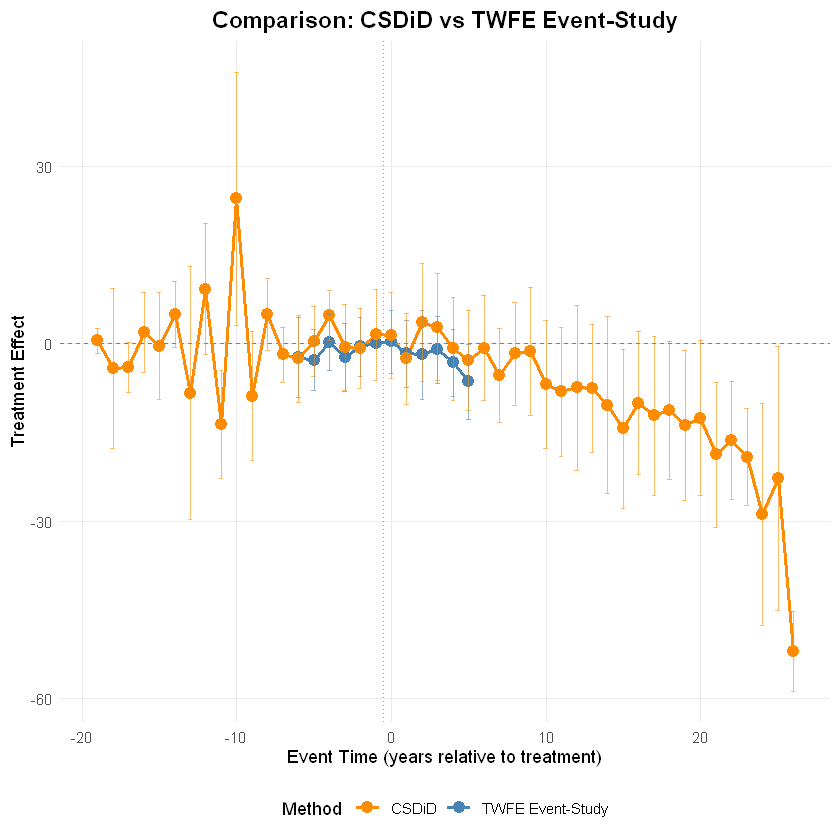

In [21]:
# 1. Cargar coeficientes de Event-Study TWFE (los que ya tienes)
es_coefs <- data.frame(
  event_time = c(-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5),
  coef = c(-2.374643, -2.746056, 0.205064, -2.356800, -0.542558, 
           0, 0.306564, -1.701350, -1.831200, -1.011992, -3.245104, -6.450939),
  se = c(3.458866, 2.633831, 2.420383, 2.948235, 2.525521, 
         0, 2.701739, 2.915905, 3.843432, 2.868525, 2.865708, 3.257638)
)

# 2. Cargar coeficientes de CSDiD (de la Parte B.3)
# Asegúrate de tener el objeto agg_dynamic de la Parte B
csdid_coefs <- data.frame(
  event_time = agg_dynamic$egt,
  coef = agg_dynamic$att.egt,
  se = agg_dynamic$se.egt
)

# 3. Crear tabla comparativa
comparison_table <- es_coefs %>%
  rename(TWFE_coef = coef, TWFE_se = se) %>%
  left_join(
    csdid_coefs %>% rename(CSDiD_coef = coef, CSDiD_se = se),
    by = "event_time"
  ) %>%
  mutate(
    TWFE_coef = round(TWFE_coef, 4),
    TWFE_se = round(TWFE_se, 4),
    CSDiD_coef = round(CSDiD_coef, 4),
    CSDiD_se = round(CSDiD_se, 4),
    Difference = round(CSDiD_coef - TWFE_coef, 4)
  )

print(comparison_table)
write.csv(comparison_table, "comparison_table.csv", row.names = FALSE)

# 4. Preparar datos para el gráfico combinado
plot_data <- bind_rows(
  es_coefs %>% mutate(Method = "TWFE Event-Study"),
  csdid_coefs %>% mutate(Method = "CSDiD")
) %>%
  mutate(
    ci_lower = coef - 1.96 * se,
    ci_upper = coef + 1.96 * se
  )

# 5. Gráfico combinado
combined_plot <- ggplot(plot_data, aes(x = event_time, y = coef, color = Method)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  geom_vline(xintercept = -0.5, linetype = "dotted", color = "red", alpha = 0.5) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), 
                width = 0.3, alpha = 0.6) +
  scale_color_manual(values = c("TWFE Event-Study" = "steelblue", 
                                 "CSDiD" = "darkorange")) +
  labs(
    title = "Comparison: CSDiD vs TWFE Event-Study",
    x = "Event Time (years relative to treatment)",
    y = "Treatment Effect",
    color = "Method"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    legend.position = "bottom",
    panel.grid.minor = element_blank()
  )

print(combined_plot)
ggsave("comparison_plot.png", combined_plot, width = 10, height = 6, dpi = 300)

## Comparación: CSDiD vs Event-Study TWFE

Al comparar los resultados de ambos métodos, observamos varias diferencias importantes en las estimaciones de los efectos del tratamiento a lo largo del tiempo.

En el período **pre-tratamiento** (event-time negativo), ambos métodos muestran coeficientes cercanos a cero en la mayoría de los períodos, lo que sugiere que la condición de tendencias paralelas se mantiene razonablemente bien. Sin embargo, notamos algunas discrepancias: por ejemplo, en t=-4, CSDiD estima un efecto de 4.80 mientras que TWFE estima 0.21, una diferencia considerable de 4.60 puntos. Esta diferencia podría deberse a que TWFE usa como referencia t=-1 (restringido a cero), mientras que CSDiD no impone esta restricción.

En el período **post-tratamiento** (event-time positivo), las diferencias entre métodos se vuelven más evidentes. En t=2, CSDiD estima un efecto positivo de 3.53, mientras que TWFE estima -1.83, una diferencia de 5.36 puntos. Estas discrepancias pueden explicarse por los problemas conocidos del método TWFE cuando hay heterogeneidad de efectos del tratamiento a lo largo del tiempo y entre grupos. TWFE puede sufrir de comparaciones incorrectas al usar unidades ya tratadas como controles para unidades recién tratadas, lo que genera estimaciones sesgadas.

Los **intervalos de confianza** de CSDiD son consistentemente más amplios que los de TWFE, reflejando mayor incertidumbre en las estimaciones. Esto es esperado dado que CSDiD usa un enfoque más conservador que evita hacer supuestos fuertes sobre la homogeneidad de efectos.

En general, **CSDiD proporciona estimaciones más confiables** cuando sospechamos que el efecto del tratamiento varía entre cohortes o a lo largo del tiempo. Las diferencias observadas entre ambos métodos sugieren que efectivamente existe heterogeneidad en los efectos del tratamiento, lo que justifica el uso de CSDiD sobre el método TWFE tradicional para este análisis.